In [153]:
import pandas as pd
import numpy as np

In [154]:
raw_data = pd.read_csv('D:/Data Science/Datasets/Datasets/Absenteeism_data.csv')
pd.options.display.max_rows = 10
raw_data

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


In [155]:
raw_data.isna().sum()

ID                           0
Reason for Absence           0
Date                         0
Transportation Expense       0
Distance to Work             0
                            ..
Body Mass Index              0
Education                    0
Children                     0
Pets                         0
Absenteeism Time in Hours    0
Length: 12, dtype: int64

In [156]:
raw_data.drop(['ID'], inplace=True, axis=1)

In [157]:
reason_dummies = pd.get_dummies(raw_data['Reason for Absence'], drop_first=True)

In [158]:
reason_reduced = pd.DataFrame()

In [159]:
reason_reduced['Reason1'] = reason_dummies.loc[:,1:14].sum(axis=1)
reason_reduced['Reason2'] = reason_dummies.loc[:,15:17].sum(axis=1)
reason_reduced['Reason3'] = reason_dummies.loc[:,18:21].sum(axis=1)
reason_reduced['Reason4'] = reason_dummies.loc[:,22:28].sum(axis=1)

In [160]:
raw_data.drop(['Reason for Absence'], inplace=True, axis=1)

In [161]:
raw_data_reason_dummies = pd.concat([raw_data, reason_reduced], axis=1)

In [162]:
raw_data = raw_data_reason_dummies.copy()

In [163]:
raw_data['Date'] = pd.to_datetime(raw_data['Date'], format='%d/%m/%Y')

In [164]:
raw_data['Month'] = [raw_data['Date'][i].month for i in range(raw_data.shape[0])]

In [165]:
raw_data['Day'] = [raw_data['Date'][i].weekday() for i in range(raw_data.shape[0])]

In [166]:
raw_data

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason1,Reason2,Reason3,Reason4,Month,Day
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,0,0,0,1,7,1
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,0,0,0,0,7,1
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,0,0,0,1,7,2
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,1,0,0,0,7,3
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,0,0,0,1,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2018-05-23,179,22,40,237.656,22,2,2,0,8,1,0,0,0,5,2
696,2018-05-23,225,26,28,237.656,24,1,1,2,3,1,0,0,0,5,2
697,2018-05-24,330,16,28,237.656,25,2,0,0,8,1,0,0,0,5,3
698,2018-05-24,235,16,32,237.656,25,3,0,0,2,0,0,0,1,5,3


In [167]:
raw_data.drop(['Date'], inplace=True, axis=1)

In [168]:
cols = ['Reason1', 'Reason2', 'Reason3','Reason4', 'Month', 'Day', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children', 'Pets', 'Absenteeism Time in Hours']

In [169]:
raw_data = raw_data[cols]

In [170]:
raw_data_1 = raw_data.copy()

In [171]:
raw_data_1['Education'] = raw_data_1['Education'].map({1:0, 2:1, 3:1, 4:1})

In [172]:
def find_target(x):
    if x>3:
        return 1
    else:
        return 0

In [173]:
raw_data_1['Tragets'] = raw_data_1['Absenteeism Time in Hours'].apply(find_target)

In [174]:
raw_data_1.drop(['Absenteeism Time in Hours'], inplace=True, axis=1)

In [175]:
data = raw_data_1.copy()

In [177]:
data.head()

,Reason1,Reason2,Reason3,Reason4,Month,Day,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Tragets
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,0


In [178]:
inputs = data.drop(['Tragets'], axis=1)
output = data['Tragets']

In [179]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_inputs = scale.fit_transform(inputs)

In [180]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, output, test_size=0.2, random_state=365)

In [181]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(560, 14) (560,)
(140, 14) (140,)


In [182]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [183]:
model.score(x_test, y_test)

0.6857142857142857

In [184]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train, y_train)

LogisticRegression()

In [185]:
reg.score(x_test, y_test)

0.7357142857142858

In [151]:
predictions = model.predict(x_test)

In [152]:
from sklearn.metrics import r2_score
rf_score = r2_score(y_test, predictions)
print(rf_score)

-0.21448709607460414


In [188]:
pd.options.display.max_columns = None
reason_dummies

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [189]:
data

,Reason1,Reason2,Reason3,Reason4,Month,Day,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Tragets
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,2,179,22,40,237.656,22,1,2,0,1
696,1,0,0,0,5,2,225,26,28,237.656,24,0,1,2,0
697,1,0,0,0,5,3,330,16,28,237.656,25,1,0,0,1
698,0,0,0,1,5,3,235,16,32,237.656,25,1,0,0,0


In [190]:
data_for_cluster = data.copy()

In [194]:
data_for_cluster['AbsenteeismTime'] = raw_data['Absenteeism Time in Hours']

In [196]:
data_for_cluster.drop(['Tragets'], inplace=True, axis=1)

In [224]:
from sklearn.cluster import KMeans
df = pd.DataFrame()
for i in range(1,20):
    k = KMeans(i)
    k.fit(data_for_cluster)
    df = df.append({'Number':i, 'WCSS':k.inertia_}, ignore_index=True)
df

C:\Users\91966\anaconda3\envs\TF\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,Number,WCSS
0,1.0,4.514260e+06
1,2.0,2.469669e+06
2,3.0,1.884420e+06
3,4.0,1.447673e+06
4,5.0,1.174757e+06
...,...,...
14,15.0,4.671338e+05
15,16.0,4.419551e+05
16,17.0,4.069797e+05
17,18.0,3.807740e+05


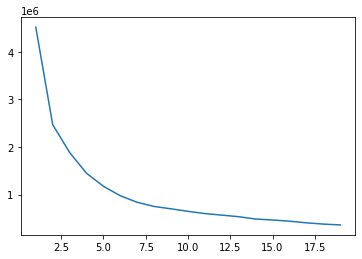

In [225]:
import matplotlib.pyplot as mt
mt.plot(df['Number'], df['WCSS'])


In [248]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data_for_cluster)
x_pca = pca.transform(data_for_cluster)
k = KMeans(7)
k.fit(x_pca)
data_for_cluster['Cluster'] = k.fit_predict(x_pca)

In [249]:
x_pca.shape

(700, 2)

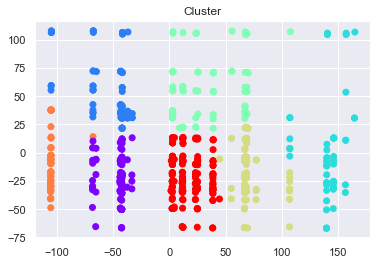

In [250]:
import seaborn as sb
sb.set()
mt.scatter(x_pca[:,0:1], x_pca[:,1:2], c=data_for_cluster['Cluster'], cmap='rainbow')
mt.title('Cluster')
mt.show()

In [253]:
from sklearn.metrics import silhouette_score
sil_avg = silhouette_score(x_pca, data_for_cluster['Cluster'])

In [254]:
sil_avg

0.4682151274403987